<a href="https://colab.research.google.com/github/dixitganesh15/Deep-Learning/blob/master/Chest_X_ray_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import zipfile
with zipfile.ZipFile(r'/content/drive/My Drive/chest_xray.zip','r') as zip_ref:
  zip_ref.extractall('')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
# from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.callbacks import  Callback, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

Using TensorFlow backend.


In [0]:
os.chdir("/content/chest_xray")

In [4]:
print(os.listdir())

['test', '.DS_Store', 'val', 'train']


In [0]:
train = '/content/chest_xray/train'
test = '/content/chest_xray/test'
val = '/content/chest_xray/val'

## Extracting the training set data into X and Y variables

In [0]:
# os.listdir(train)
train_n = train+'/NORMAL/'
train_p = train+'/PNEUMONIA/'

In [7]:
print(len(os.listdir(train_n)))

1342


In [0]:
X = []
Y = []

img_name_n = os.listdir(train_n)
for i in range(1,len(img_name_n)):
    img = cv2.imread(train_n + img_name_n[i],0)
    try:
      img = cv2.resize(img,(256,256))
    except:
      continue
    
    X.append(img)
    Y.append(0)
    
img_name_p = os.listdir(train_p)    
for j in range(1,len(img_name_p)):
    img = cv2.imread(train_p + img_name_p[j],0)
    try:
      img = cv2.resize(img, (256,256))
    except:
      continue
    
    X.append(img)
    Y.append(1)

In [9]:
len(img_name_p)

3876

In [10]:
img_name_p[1]

'person1670_bacteria_4425.jpeg'

In [0]:
X = np.array(X)
Y = np.array(Y)

In [12]:
X.shape

(5214, 256, 256)

In [13]:
Y.shape

(5214,)

In [0]:
X,Y = shuffle(X,Y)

In [0]:
# cv2.imshow("Chest",X[0])
# cv2.waitKey(0)
# cv2.destroyAllWindows()

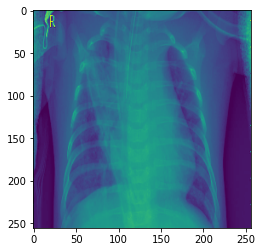

In [16]:
plt.imshow(X[0])

## Extracting the validation data into X_val and Y_val variables

In [0]:
os.listdir(val)
train_nv = val +'/NORMAL/'
train_pv = val +'/PNEUMONIA/'

In [0]:
X_val = []
Y_val = []

img_name_n = os.listdir(train_nv)
for i in range(1,len(img_name_n)):
    img = cv2.imread(train_nv + img_name_n[i],0)
    try:
      img = cv2.resize(img, (256,256))
    except:
      continue
    
    X_val.append(img)
    Y_val.append(0)
    
img_name_p = os.listdir(train_pv)    
for j in range(1,len(img_name_p)):
    img = cv2.imread(train_pv + img_name_p[j],0)
    try:
      img = cv2.resize(img, (256,256))
    except:
      continue
    
    X_val.append(img)
    Y_val.append(1)

In [0]:
X_val = np.array(X_val)
Y_val = np.array(Y_val)

In [0]:
X_val,Y_val = shuffle(X_val,Y_val)

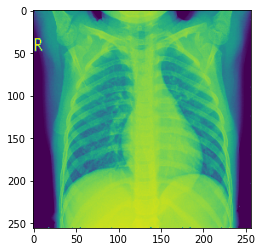

In [21]:
plt.imshow(X_val[0])

In [22]:
print(X_val.shape, Y_val.shape)

(14, 256, 256) (14,)


In [0]:
X_val = X_val.reshape(14,256,256,1)

## Extracting the test data into X_t and Y_t

In [0]:
os.listdir(test)
train_n_test = test +'/NORMAL/'
train_p_test = test +'/PNEUMONIA/'

In [0]:
X_t = []
Y_t = []

img_name_nt = os.listdir(train_n_test)
for i in range(1,len(img_name_nt)):
    img = cv2.imread(train_n_test + img_name_nt[i],0)
    try:
      img = cv2.resize(img, (256,256))
    except:
      continue
    
    X_t.append(img)
    Y_t.append(0)
    
img_name_pt = os.listdir(train_p_test)    
for j in range(1,len(img_name_pt)):
    img = cv2.imread(train_p_test + img_name_pt[j],0)
    try:
      img = cv2.resize(img, (256,256))
    except:
      continue
    
    X_t.append(img)
    Y_t.append(1)

In [0]:
X_t = np.array(X_t)
Y_t = np.array(Y_t)

In [0]:
X_t,Y_t = shuffle(X_t,Y_t)

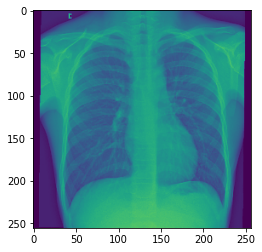

In [28]:
plt.imshow(X_t[0])

In [29]:
print(X_t.shape,Y_t.shape)

(622, 256, 256) (622,)


In [0]:
X_t = X_t.reshape(622,256,256,1)

## Splitting the "train" data into Training data and testing data

In [0]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train,y_test = train_test_split(X,Y,test_size = 0.25, random_state = 10)

In [0]:
# X_train.shape

In [0]:
# y_train.shape

In [0]:
X = X.reshape(5214,256,256,1)

## Building the convolution neural network

In [0]:
model = Sequential()
model.add(Conv2D(32,(3,3), padding= 'same', activation = 'relu', input_shape = (256,256,1)))
model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32,(3,3), padding= 'same', activation = 'relu'))
model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32,(3,3), padding= 'same', activation = 'relu'))
model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(32, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32,activation = 'relu'))
model.add(Dense(1,activation='sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [38]:
history = model.fit(X,Y,epochs = 50, batch_size=10, validation_data = (X_val,Y_val),verbose=1,callbacks=[callback])

Epoch 1/50
522/522 [==============================] - 11s 21ms/step - loss: 0.3704 - accuracy: 0.8370 - val_loss: 2.8195 - val_accuracy: 0.5000
Epoch 2/50
522/522 [==============================] - 11s 20ms/step - loss: 0.3002 - accuracy: 0.8769 - val_loss: 2.5100 - val_accuracy: 0.6429
Epoch 3/50
522/522 [==============================] - 11s 20ms/step - loss: 0.2699 - accuracy: 0.8886 - val_loss: 0.4547 - val_accuracy: 0.7143
Epoch 4/50
522/522 [==============================] - 11s 20ms/step - loss: 0.2454 - accuracy: 0.8999 - val_loss: 2.0692 - val_accuracy: 0.6429
Epoch 5/50
522/522 [==============================] - 11s 20ms/step - loss: 0.2301 - accuracy: 0.9043 - val_loss: 0.2205 - val_accuracy: 0.9286
Epoch 6/50
522/522 [==============================] - 11s 20ms/step - loss: 0.2125 - accuracy: 0.9122 - val_loss: 0.1565 - val_accuracy: 1.0000
Epoch 7/50
522/522 [==============================] - 11s 20ms/step - loss: 0.2191 - accuracy: 0.9099 - val_loss: 0.2244 - val_accuracy:

In [0]:
y_pred  = model.predict(X_t)
y_pred = np.round(y_pred)

In [40]:
print(confusion_matrix(Y_t, y_pred))

[[163  70]
 [ 22 367]]


In [41]:
print(accuracy_score(Y_t, y_pred))

0.8520900321543409


In [42]:
print(classification_report(Y_t, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78       233
           1       0.84      0.94      0.89       389

    accuracy                           0.85       622
   macro avg       0.86      0.82      0.83       622
weighted avg       0.86      0.85      0.85       622



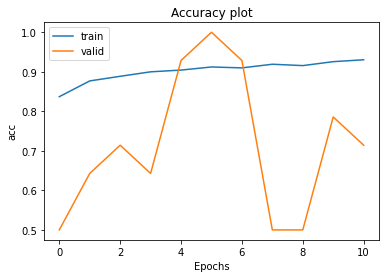

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy plot")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend(['train', 'valid'])

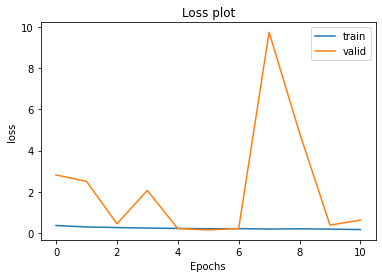

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss plot")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(['train', 'valid'])